# Школа Лингвистики
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №6, использование YOUTUBE.API

Задание выполнил(а): Дарья Матяш, БКЛ-181

In [38]:
# загрузили все необходимое
# pip install google-api-python-client
# pip install google_auth_oauthlib

Ссылка на условие дз: https://github.com/hse-python-2nd-2019/homework/blob/master/hw6/hw6-2.md

## Обработка данных

Для начала импортируем нужные модули

In [39]:
import os
from pprint import pprint
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import isodate

In [40]:
client_secrets_file = "client_secret_1005316915329-ejvd080r8da0gvjk5hra761qgv5f9c1g.apps.googleusercontent.com.json"

In [41]:
scopes = ["https://www.googleapis.com/auth/youtube.readonly", 'https://www.googleapis.com/auth/youtube.force-ssl']

In [46]:
os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

In [47]:
api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "client_secret_1005316915329-ejvd080r8da0gvjk5hra761qgv5f9c1g.apps.googleusercontent.com.json"

flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(client_secrets_file, scopes)
credentials = flow.run_console()
youtube = googleapiclient.discovery.build(api_service_name, api_version, credentials=credentials)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=1005316915329-ejvd080r8da0gvjk5hra761qgv5f9c1g.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=iDipR3PZMKYpxNHRuvAZVKOrOd19Q2&prompt=consent&access_type=offline


Enter the authorization code:  4/zQFfH1xYaTpL2kLAT__KtR0SF0MaYGmcrefpIUCdcvOjn-FVYOQ4AQI


Возьмём Youtube-канал, выведем его название.

In [48]:
request = youtube.channels().list(
    part="snippet",
    id="UCik7MxUtSXXfT-f_78cQRfQ"
)
response = request.execute()

In [49]:
print(response['items'][0]['snippet']['description'][:41])

«Россия-Культура» (Культура или Россия К)


Сохраним id топ-5 любимых передач(они же плейлисты в Youtube) канала:

In [50]:
ids = {'Линия жизни': "PL66DIGaegedpYptAQS7f5RZKNpUzQ6G52",
      'Легенды мирового кино': "PL66DIGaegedqPqZGs0SYwMHtMfI3DKP08",
      'Нескучная классика': "PL66DIGaegedrNlKpNxD48yhCB_g65R-MR",
      'Агора': "PL66DIGaegedoTZjKax2Fr17xho09ugY_Q",
      'Спектакли': "PL66DIGaegedr5f2Ewm2u-A-dji9rDJeIv",
      'Пешком': "PL66DIGaegedpZljXE6XIyEusIZheJDjbZ"}

Сохраним по 50(максимальное число запросов) видео с каждого плейлиста:

In [51]:
video_ids = []
video_publ =[]
playlists = []              
for i in range(len(ids)):
    request = youtube.playlistItems().list(
    part="contentDetails",
    playlistId=list(ids.values())[i],
    maxResults=50
)
    response = request.execute()
    for j in range(50):
#         print(list(response['items'][j]['contentDetails'].values())[1])
        video_ids.append(list(response['items'][j]['contentDetails'].values())[0])
        video_publ.append(str(isodate.parse_date(list(response['items'][j]['contentDetails'].values())[1])))
        playlists.append(list(ids.keys())[i] + '-' + list(ids.values())[i])

In [52]:
programme = [playlists[i].split('-')[0] for i in range(len(playlists))]

In [53]:
print(programme[0])

Линия жизни


In [54]:
vid_dur = []
vid_dur_sec = []
vid_tags = []
all_tags = ''
views= []
likes = []
dislikes = []
comments_count = []
for video_id in range(len(video_ids)):
    request = youtube.videos().list(
    part="contentDetails, snippet, statistics",
    id=video_ids[video_id]
)
    response = request.execute()
    vid_dur.append(str(isodate.parse_duration(response['items'][0]['contentDetails']['duration'])))
    wtp = str(isodate.parse_duration(response['items'][0]['contentDetails']['duration'])).split(':')  
    secs = (int(wtp[0]) * 60 + int(wtp[1])) * 60 + int(wtp[2])
    vid_dur_sec.append(secs)
    vid_tags.append((response['items'][0]['snippet']['tags']))
    all_tags += ' '.join(response['items'][0]['snippet']['tags'])
    views.append(int(response['items'][0]['statistics']['viewCount']))
    likes.append(int(response['items'][0]['statistics']['likeCount']))
    dislikes.append(int(response['items'][0]['statistics']['dislikeCount']))
    comments_count.append(int(response['items'][0]['statistics']['commentCount']))

In [55]:
import pandas as pd

In [56]:
df = pd.DataFrame({
    'video_ids': video_ids,
    'video_publ': video_publ,
    'programme': programme,
    'vid_tags': vid_tags,
    'vid_dur': vid_dur,
    'vid_dur_sec': vid_dur_sec, 
    'views': views,
    'likes': likes,
    'dislikes': dislikes,
    'comments_count': comments_count
    })
df.head(10)

,video_ids,video_publ,programme,vid_tags,vid_dur,vid_dur_sec,views,likes,dislikes,comments_count
0,0iZ_4HWMbtE,2020-04-26,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:53:17,3197,1940,55,2,4
1,Xm9mV84DQqc,2020-04-11,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:52:16,3136,34696,733,78,216
2,cJRD_psyGhI,2020-04-04,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:52:50,3170,1947,40,0,1
3,4zdOH1TcqSM,2020-03-28,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:53:54,3234,1580,47,2,6
4,jDNe2Rq-ZxY,2020-03-20,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:52:00,3120,2467,85,1,9
5,n3stOYq4ohc,2020-03-14,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:53:06,3186,8704,273,14,19
6,vhVkWFHEchE,2020-02-22,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:52:34,3154,1478,35,2,2
7,dG8mns7L-cI,2020-02-15,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:51:59,3119,1102,29,5,1
8,RujTW5s-Cjk,2020-02-08,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",0:59:51,3591,13751,384,12,28
9,-1PbWnH0eFI,2020-01-25,Линия жизни,"[линия жизни, телеканал культура, культура, ка...",1:07:21,4041,3348,64,2,7


## Сохранение данных

In [57]:
df.to_csv('hw_06_02.csv')

## Визуализация данных

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

### __График 1:__ Распределение просмотров и числа комментариев.

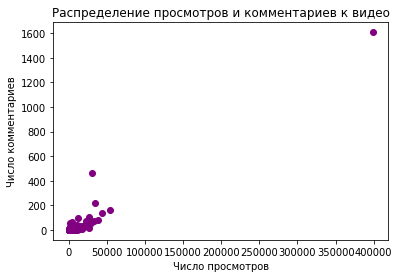

In [70]:
X = views
Y = comments_count

plt.scatter(X, Y, color='purple')

plt.title('Распределение просмотров и комментариев к видео')
plt.ylabel('Число комментариев')
plt.xlabel('Число просмотров')
plt.show()

### __Облако слов.__

Сделаем WordCloud самых частотных тегов 6 плейлистов канала "ТК Культура".

In [266]:
from wordcloud import WordCloud

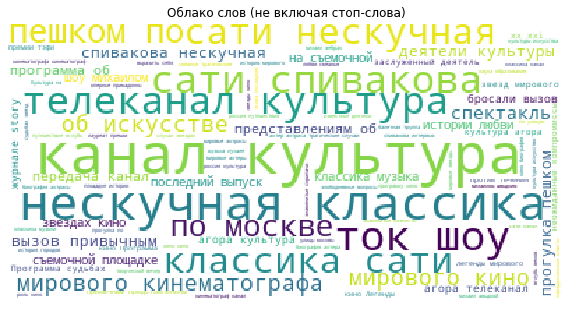

In [273]:
wordcloud = WordCloud( background_color ='white',).generate(all_tags)
# отобразим вордклауд

plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (не включая стоп-слова)')
plt.show()

### __Сбор 1000+ комментариев.__

Я выбрала клипы всемирноизвестной группы 'Little Big' и собрала необходимую информацию о комментариях: длина комментария, его язык, число лайков под комментариев, число ответов на него,  id самого комментария.

In [71]:
from langdetect import detect

In [72]:
comments_temp = []
comment_id_temp = []
reply_count_temp = []
like_count_temp = []
lang_comm = []
len_comm = []

video_ids_new= {'UNO':"L_dWvTCdDQ4",
                'GO BANANAS':"ADlGkXAz1D0",
               'GIVE ME YOUR MONEY': "2uTMTyqQxl4",
                'I AM OK': "SsFI40bXROs",
                'KÖLN CONCERT': "J5eYPjntDlA",
                'SKIBIDI': "mDFBTdToRmw",
                'POLYUSHKO POLYE': "kjilYa1zxSg",
                'ANTIPOSITIVE': "WTRldz7aUos",
                'FARADENZA': "1t_sMynan_k",
                'WITH RUSSIA FROM LOVE': "j4IgNPmaKkw",
               'LollyBomb': "FBnAZnfNB6U"}

from tqdm import tqdm
for i, video in enumerate(tqdm(list(video_ids_new.values()), ncols = 1000)):
    response = youtube.commentThreads().list(
                    part = 'snippet',
                    videoId = video,
                    maxResults = 100, # Only take top 100 comments...
                    order = 'relevance', #... ranked on relevance
                    textFormat = 'plainText',
                    ).execute()
    
    for item in response['items']:
        comments_temp.append(item['snippet']['topLevelComment']['snippet']['textDisplay'])
        comment_id_temp.append(item['snippet']['topLevelComment']['id'])
        reply_count_temp.append(item['snippet']['totalReplyCount'])
        like_count_temp.append(item['snippet']['topLevelComment']['snippet']['likeCount'])
        lang_comm.append(detect(item['snippet']['topLevelComment']['snippet']['textDisplay']))
        len_comm.append(len(item['snippet']['topLevelComment']['snippet']['textDisplay']))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:13<00:00,  1.18s/it]

Сохраним нашу базу данных:

In [73]:
df2 = pd.DataFrame({
    'comment_id': comment_id_temp,
    'comments': comments_temp,
    'reply_count ': reply_count_temp ,
    'like_count': like_count_temp,
    'lang_comm': lang_comm,
    'len_comm': len_comm, 
    })
df2.head(10)

,comment_id,comments,reply_count,like_count,lang_comm,len_comm
0,UgyrK99uOcxdEmTrW_14AaABAg,Add or download the song to your own playlist:...,449,24887,en,161
1,UgzSvB2k2HcNlpvbCHl4AaABAg,Little Big не смогли решить кого убрать из ном...,144,20847,ru,106
2,UgzR436LpFobm_9AAVN4AaABAg,Шла какая-то неделя карантина...попытки научит...,12,1552,ru,207
3,UgwMyNMjB6DFJxpuu4N4AaABAg,"Используй эту кнопку, как функцию дополнительн...",13,1765,ru,55
4,UgwrFvKZlO2IhI5myAh4AaABAg,listening songs of all countries and suddenly ...,1,110,en,91
5,UgyBr36rb0LezBLQVzl4AaABAg,Я: Посмотрела клип\nМозг: Посмотри ещё раз\nЯ:...,4,134,ru,91
6,UgyDsX7hewdtu4fdgtx4AaABAg,"Решали кого убрать, в итоге убрали Евровидение.",78,14183,ru,47
7,UgzIRSawZoMspYmz-wJ4AaABAg,Другие участники: 500к просмотров\nLittle Big:...,1,81,ru,73
8,UgzZZhUbfH6P6vOYaTR4AaABAg,"Квест под названием ""Найди иностранный коммент...",3,57,ru,59
9,UgxGCeDdZE811ezacMJ4AaABAg,"Ну что пацаны, осилим на карантине ещё 49М про...",1,37,ru,78


In [74]:
df2.to_csv('hw_06_02_2.csv')

## Визуализация данных

Посмотрим, какая длина комментариев в зависимости от языка:

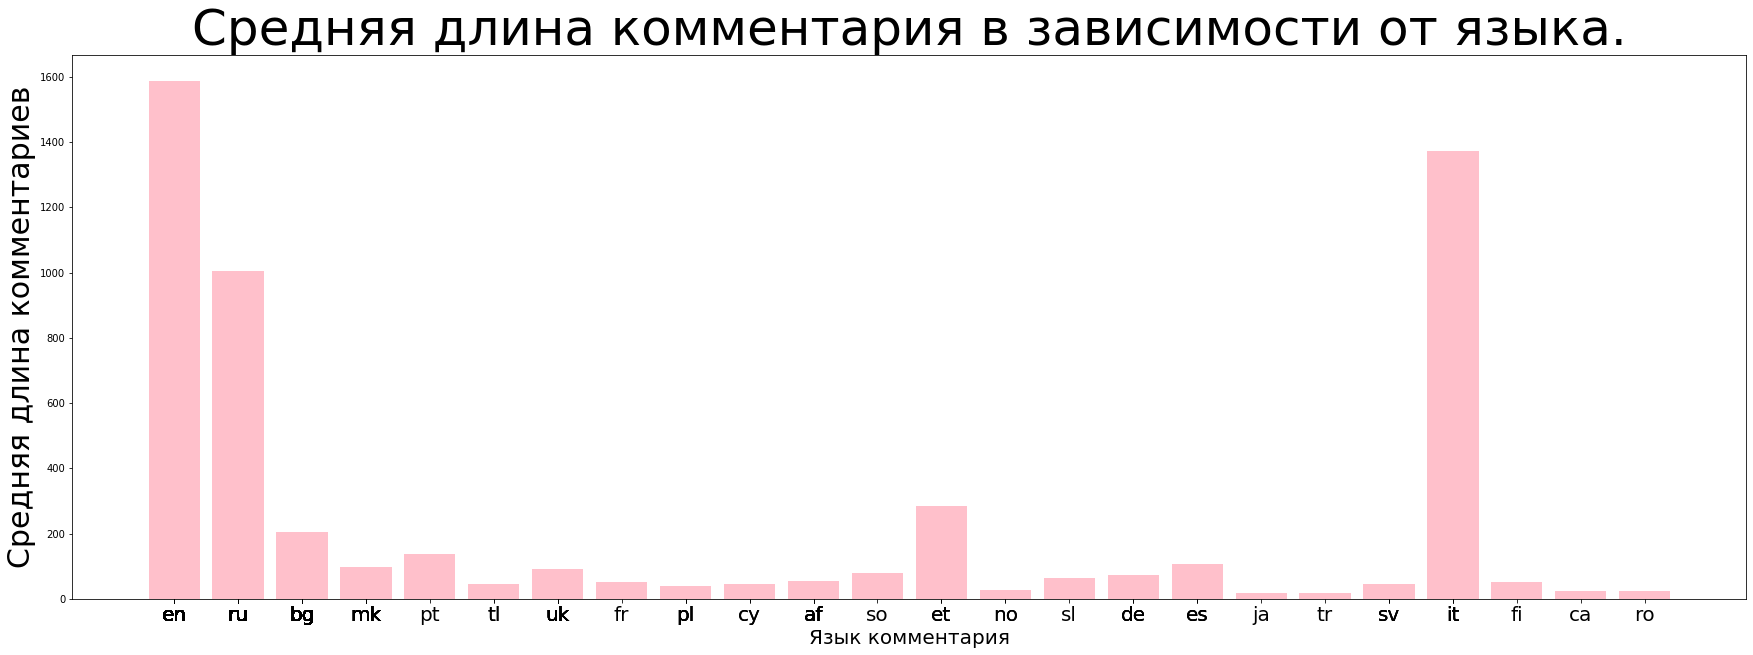

In [85]:
plt.figure(figsize=(30,10))

X = lang_comm
Y = len_comm

plt.bar(X, Y, color='pink')

plt.xticks(ticks=X, labels=X, fontsize="20")
plt.title('Средняя длина комментария в зависимости от языка.', fontsize="50")
plt.ylabel('Средняя длина комментариев', fontsize="30")
plt.xlabel('Язык комментария', fontsize="20")
plt.show()

Получилось, что самыми многословными являются пользователи, которые комментировали видео группы на английском языке, а также русском или итальянском.

Теперь посмотрим, как примерно распределены лайки между комментариями разных языков:

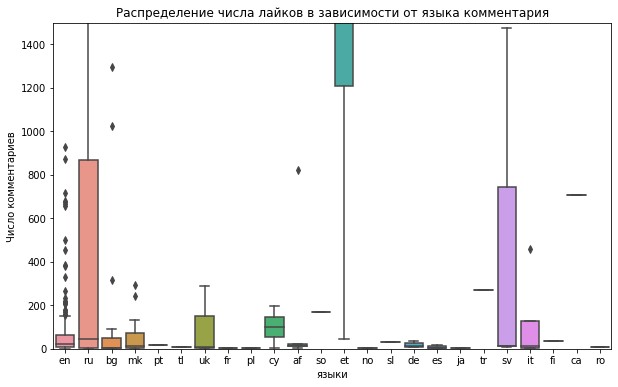

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="lang_comm", y="like_count", data=df2)
plt.ylim((0, 1500))
plt.title('Распределение числа лайков в зависимости от языка комментария')
plt.ylabel('Число комментариев')
plt.xlabel('языки');

In [ ]:
Интересно, что чаще всего ставят лайки комментариям, написанным на русском или 